##  Import All Libraries

In [8]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print(" MODEL COMPARISON: Decision Tree vs Neural Network")
print("=" * 60)

 MODEL COMPARISON: Decision Tree vs Neural Network


## 1.Loading models.

In [9]:
print("\n Loading models...")

# Load Decision Tree model
with open('../models/decision_tree_model.pkl', 'rb') as f:
    dt_results = pickle.load(f)

# Load Neural Network model
with open('../models/neural_network_model.pkl', 'rb') as f:
    nn_results = pickle.load(f)

# Load test data
with open('../models/preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)
    y_test = data['y_test']  # True values

print(" Models loaded successfully")

# Geting predictions from both models
y_test_pred_dt = dt_results['test_predictions']
y_test_proba_dt = dt_results['test_probabilities']

y_test_pred_nn = nn_results['test_predictions']
y_test_proba_nn = nn_results['test_probabilities']


 Loading models...
 Models loaded successfully


## 2.Calculating performance metrics..

In [10]:
print("\n Calculating performance metrics...")


# Function to calculate all metrics
def get_all_metrics(y_true, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_proba)
    }


# Calculate for Decision Tree
dt_metrics = get_all_metrics(y_test, y_test_pred_dt, y_test_proba_dt)
print("\nDecision Tree Metrics:")
for metric, value in dt_metrics.items():
    print(f"  {metric:12}: {value:.4f}")

# Calculate for Neural Network
nn_metrics = get_all_metrics(y_test, y_test_pred_nn, y_test_proba_nn)
print("\nNeural Network Metrics:")
for metric, value in nn_metrics.items():
    print(f"  {metric:12}: {value:.4f}")


 Calculating performance metrics...

Decision Tree Metrics:
  Accuracy    : 0.7410
  Precision   : 0.5077
  Recall      : 0.7941
  F1-Score    : 0.6194
  ROC-AUC     : 0.8316

Neural Network Metrics:
  Accuracy    : 0.7949
  Precision   : 0.6139
  Recall      : 0.6123
  F1-Score    : 0.6131
  ROC-AUC     : 0.8418


## 3.Creating bar chart comparison.


 Creating bar chart comparison...


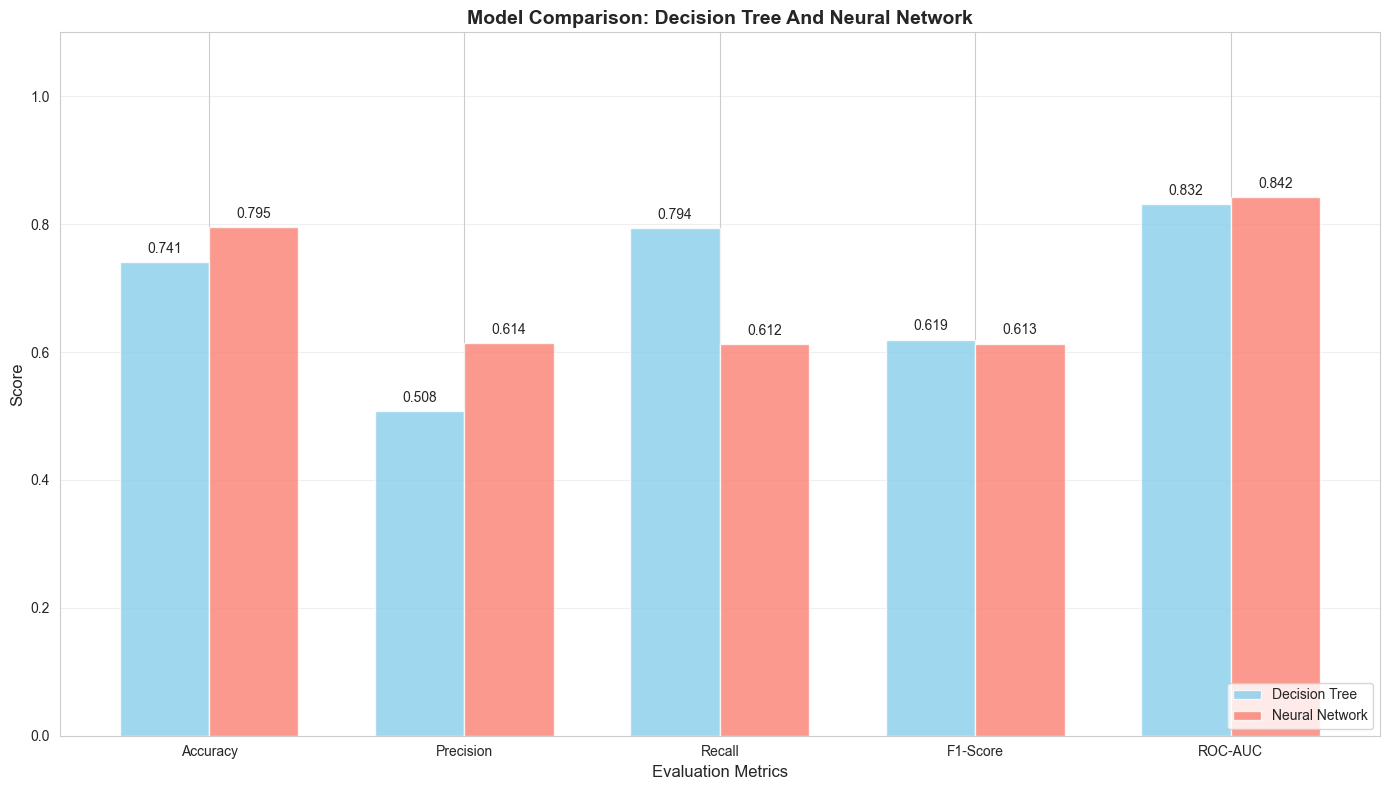

In [11]:
print("\n Creating bar chart comparison...")

# comparison table
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
dt_scores = [dt_metrics[m] for m in metrics_list]
nn_scores = [nn_metrics[m] for m in metrics_list]

# bar chart
plt.figure(figsize=(14, 8))

x = np.arange(len(metrics_list))
width = 0.35

# Plot bars
bars1 = plt.bar(x - width / 2, dt_scores, width,
                label='Decision Tree', alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width / 2, nn_scores, width,
                label='Neural Network', alpha=0.8, color='salmon')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# Customize chart
plt.xlabel('Evaluation Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Comparison: Decision Tree And Neural Network', fontsize=14, fontweight='bold')
plt.xticks(x, metrics_list)
plt.legend(loc='lower right')
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 4. ANALYSIS

In [12]:
print("\n" + "=" * 60)
print(" SIMPLE ANALYSIS")
print("=" * 60)

# Compare each metric
print("\nComparison by Metric:")
print("-" * 30)

for metric in metrics_list:
    dt_score = dt_metrics[metric]
    nn_score = nn_metrics[metric]

    if dt_score > nn_score:
        winner = "Decision Tree"
        diff = dt_score - nn_score
    elif nn_score > dt_score:
        winner = "Neural Network"
        diff = nn_score - dt_score
    else:
        winner = "Tie"
        diff = 0

    print(f"{metric:12}: {winner} (DT: {dt_score:.3f}, NN: {nn_score:.3f})")

# Count wins
dt_wins = sum(1 for metric in metrics_list if dt_metrics[metric] > nn_metrics[metric])
nn_wins = sum(1 for metric in metrics_list if nn_metrics[metric] > dt_metrics[metric])
ties = len(metrics_list) - dt_wins - nn_wins

# Overall recommendation
if dt_wins > nn_wins:
    print("\n Conclusion: Decision Tree performs better overall")
elif nn_wins > dt_wins:
    print("\n Conclusion: Neural Network performs better overall")



 SIMPLE ANALYSIS

Comparison by Metric:
------------------------------
Accuracy    : Neural Network (DT: 0.741, NN: 0.795)
Precision   : Neural Network (DT: 0.508, NN: 0.614)
Recall      : Decision Tree (DT: 0.794, NN: 0.612)
F1-Score    : Decision Tree (DT: 0.619, NN: 0.613)
ROC-AUC     : Neural Network (DT: 0.832, NN: 0.842)

 Conclusion: Neural Network performs better overall
